In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
df=pd.read_csv(r"C:\Users\hp\Downloads\aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [364]:
df.shape

(180, 9)

In [365]:
df.size

1620

In [366]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


This shows that there are no null values in the data.

In [368]:
#For numerical variables
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [451]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No Null Values

In [369]:
#For categorical variables
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [370]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [371]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [372]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [373]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [374]:
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


- There are no duplicates as can be seen in the above output.

# Outliers Detection and Univariate Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


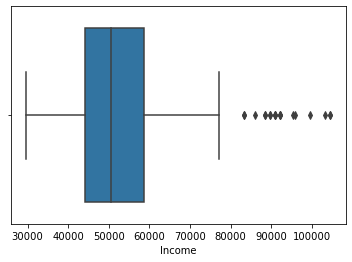

In [375]:
sns.boxplot(df['Income'])
plt.show()

In [376]:
Q1=np.percentile(df['Income'],[25])
Q3=np.percentile(df['Income'],[75])
Mean=np.mean(df['Income'])
Median=np.percentile(df['Income'],[50])
Q1,Q3,Mean,Median

(array([44058.75]), array([58668.]), 53719.57777777778, array([50596.5]))

In [377]:
np.percentile(df['Income'],[50])

array([50596.5])

In [378]:
IQR=Q3-Q1
IQR

array([14609.25])

In [379]:
Lower_Whisker=Q1-(1.5*IQR)
Upper_Whisker=Q3+(1.5*IQR)
Lower_Whisker,Upper_Whisker

(array([22144.875]), array([80581.875]))

- Observations:
    - Mean Salary is 53719.
    - Median  Salary is $ 50596. 
    
    - Salary greater than $ 80581.875 are outliers.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


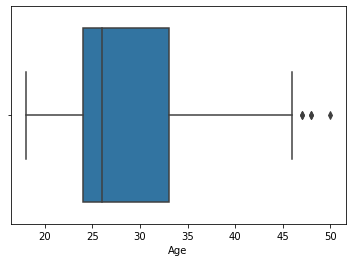

In [380]:
sns.boxplot(df['Age'])
plt.show()

In [381]:
#Age Column
Q1=np.percentile(df['Age'],[25])
Q3=np.percentile(df['Age'],[75])
Median=np.percentile(df['Age'],[50])
Mean=np.mean(df['Age'])
IQR=Q3-Q1
Lower_Whisker=Q1-(1.5*IQR)
Upper_Whisker=Q3+(1.5*IQR)

Q1,Q3,Mean,Median,IQR,Lower_Whisker,Upper_Whisker

(array([24.]),
 array([33.]),
 28.788888888888888,
 array([26.]),
 array([9.]),
 array([10.5]),
 array([46.5]))

- Customers using treadmill are between ages 10-47.
- Median Age is 26 and Mean age is 28.8
- 50% of the customers who use treadmill are between 24-33 Years of Age. 
- Customers using treadmill above 47 Years of age are outliers.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


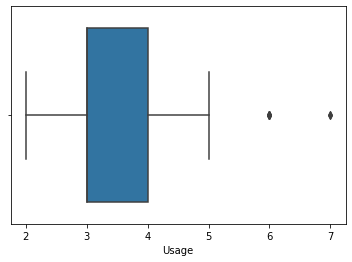

In [382]:
sns.boxplot(df['Usage'])
plt.show()

In [383]:
# Usage Column
Q1=np.percentile(df['Usage'],[25])
Q3=np.percentile(df['Usage'],[75])
Median=np.percentile(df['Usage'],[50])
Mean=np.mean(df['Usage'])
IQR=Q3-Q1
Lower_Whisker=Q1-(1.5*IQR)
Upper_Whisker=Q3+(1.5*IQR)

Q1,Q3,Mean,Median,IQR,Lower_Whisker,Upper_Whisker

(array([3.]),
 array([4.]),
 3.4555555555555557,
 array([3.]),
 array([1.]),
 array([1.5]),
 array([5.5]))

- Customers use treadmill between 3-5.5 days in a Week.
- Median no of days of usage in a week is 3 and mean is 3.5.
- 50% of the customers use treadmill 3-4 days a week 
- Customers using treadmill for over more than 5.5 days a week are outliers.

In [384]:
# Miles Column
Q1=np.percentile(df['Miles'],[25])
Q3=np.percentile(df['Miles'],[75])
Median=np.percentile(df['Miles'],[50])
Mean=np.mean(df['Miles'])
IQR=Q3-Q1
Lower_Whisker=min(Q1-(1.5*IQR),df['Miles'].min())
Upper_Whisker=Q3+(1.5*IQR)

Q1,Q3,Mean,Median,IQR,Lower_Whisker,Upper_Whisker

(array([66.]),
 array([114.75]),
 103.19444444444444,
 array([94.]),
 array([48.75]),
 array([-7.125]),
 array([187.875]))

- Most of the customers run between 66-114 Miles in a week.
- Customers who run more than 188 Miles in a week are outliers.
- Mean of Miles are 103 and Median is 94.

In [385]:
gender_distribution=df['Gender'].value_counts()
gender_distribution

Male      104
Female     76
Name: Gender, dtype: int64

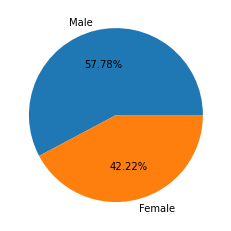

In [386]:
plt.pie(df['Gender'].value_counts().values,autopct='%.2f%%',labels=df['Gender'].value_counts().index)
plt.show()

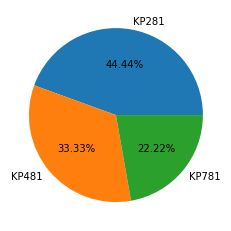

In [387]:
plt.pie(df['Product'].value_counts().values,autopct='%.2f%%',labels=df['Product'].value_counts().index)
plt.show()

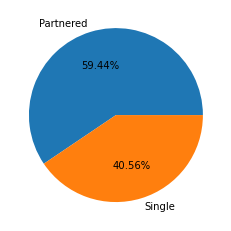

In [388]:
plt.pie(df['MaritalStatus'].value_counts().values,autopct='%.2f%%',labels=df['MaritalStatus'].value_counts().index)
plt.show()

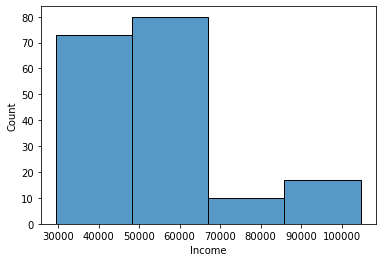

In [389]:
#Distributing the Income in 4 Groups: 'Low' 'Medium' 'High' 'Very High'
sns.histplot(df['Income'],bins=4)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Density'>

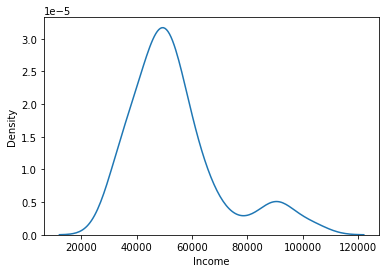

In [390]:
sns.kdeplot(df['Income'])

Most of the Customer's Salary ranges between 20k to 75k USD Anually.

# Effect of different features on product purchased

## Bi-variate

#### Marital Status VS Product

In [391]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [392]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


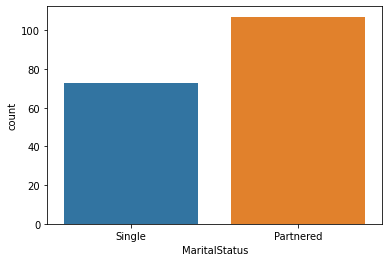

In [393]:
sns.countplot(df['MaritalStatus'])
plt.show()

- 107 Customers are Married and 73 are single.

In [394]:
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


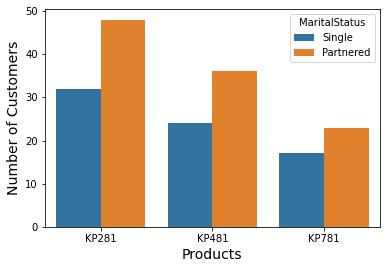

In [395]:
sns.countplot(data=df,x=df['Product'],hue=df['MaritalStatus'],dodge=True)
plt.ylabel('Number of Customers',fontsize=14)
plt.xlabel('Products',fontsize=14)
plt.show()

Marginal Probabilities:

In [396]:
#P[KP281]
len(df[df['Product']=='KP281'])/len(df)

0.4444444444444444

In [397]:
#P[KP481]
len(df[df['Product']=='KP481'])/len(df)

0.3333333333333333

In [398]:
#P[KP781]
len(df[df['Product']=='KP781'])/len(df)

0.2222222222222222

In [399]:
#p[Single]
len(df[df['MaritalStatus']=='Single'])/len(df)

0.40555555555555556

In [400]:
#p[Partnered]
len(df[df['MaritalStatus']=='Partnered'])/len(df)

0.5944444444444444

Joint Probability

In [401]:
#P[KP281 ∩ Single]
len(df[(df['Product']=='KP281') & (df['MaritalStatus']=='Single')])/len(df)

0.17777777777777778

In [402]:
#P[K281 ∩ Partnered]
len(df[(df['Product']=='KP281') & (df['MaritalStatus']=='Partnered')])/len(df)

0.26666666666666666

In [403]:
#P[K481 ∩ Single]
len(df[(df['Product']=='KP481') & (df['MaritalStatus']=='Single')])/len(df)

0.13333333333333333

In [404]:
#P[K481 ∩ Partnered]
len(df[(df['Product']=='KP481') & (df['MaritalStatus']=='Partnered')])/len(df)

0.2

In [405]:
#P[K781 ∩ Single]
len(df[(df['Product']=='KP781') & (df['MaritalStatus']=='Single')])/len(df)

0.09444444444444444

In [406]:
#P[K781 ∩ Partnered]
len(df[(df['Product']=='KP781') & (df['MaritalStatus']=='Partnered')])/len(df)

0.12777777777777777

Now we will see different conditional probabilities:

In [407]:
#p(single|KP281)
KP281_data=df[df['Product']=='KP281']
len(KP281_data[KP281_data['MaritalStatus']=='Single'])/len(KP281_data)

0.4

In [408]:
#p(single|KP481)
KP481_data=df[df['Product']=='KP481']
len(KP481_data[KP481_data['MaritalStatus']=='Single'])/len(KP481_data)

0.4

In [409]:
#p(single|KP781)
KP781_data=df[df['Product']=='KP781']
len(KP781_data[KP781_data['MaritalStatus']=='Single'])/len(KP781_data)

0.425

In [410]:
#p(Partnered|KP281)
KP281_data=df[df['Product']=='KP281']
len(KP281_data[KP281_data['MaritalStatus']=='Partnered'])/len(KP281_data)

0.6

In [479]:
#p(Partnered|KP481)
KP481_data=df[df['Product']=='KP481']
len(KP481_data[KP481_data['MaritalStatus']=='Partnered'])/len(KP481_data)

0.6

In [480]:
#p(Partnered|KP781)
KP781_data=df[df['Product']=='KP781']
len(KP781_data[KP781_data['MaritalStatus']=='Partnered'])/len(KP781_data)

0.575

In [481]:
#P(KP281/Single)
single_data=df[df['MaritalStatus']=='Single']
len(single_data[single_data['Product']=='KP281'])/len(single_data)


0.4383561643835616

In [482]:
#P(KP281/Partnered)
single_data=df[df['MaritalStatus']=='Partnered']
len(single_data[single_data['Product']=='KP281'])/len(single_data)

0.4485981308411215

In [415]:
#P(KP481/Single)
single_data=df[df['MaritalStatus']=='Single']
len(single_data[single_data['Product']=='KP481'])/len(single_data)

0.3287671232876712

In [416]:
#P(KP481/Partnered)
single_data=df[df['MaritalStatus']=='Partnered']
len(single_data[single_data['Product']=='KP481'])/len(single_data)

0.3364485981308411

In [417]:
#P(KP781/Single)
single_data=df[df['MaritalStatus']=='Single']
len(single_data[single_data['Product']=='KP781'])/len(single_data)

0.2328767123287671

In [418]:
#P(KP781/Partnered)
single_data=df[df['MaritalStatus']=='Partnered']
len(single_data[single_data['Product']=='KP781'])/len(single_data)

0.21495327102803738

We can see that Product purchases in not dependent on Marital Status

Gender VS Product

In [419]:
pd.crosstab(df['Product'],df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


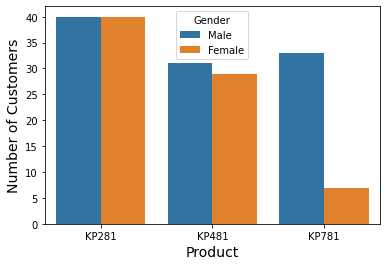

In [420]:
sns.countplot(data=df,x=df['Product'],hue=df['Gender'],dodge=True)
plt.ylabel('Number of Customers',fontsize=14)
plt.xlabel('Product',fontsize=14)
plt.show()

- The customers buying KP281 can equally be a male or a female.
- We can see little more males than female who buy KP481.
- Number of males buying KP781 are significantly high.

Marginal Probabilities:

In [421]:
#P[Male]
len(df[df['Gender']=='Male'])/len(df)

0.5777777777777777

In [422]:
#P[Female]
len(df[df['Gender']=='Female'])/len(df)

0.4222222222222222

Joint Probabilities:

In [423]:
#P[Male ∩ KP281]
len(df[(df['Product']=='KP281') & (df['Gender']=='Male')])/len(df)

0.2222222222222222

In [424]:
#P[Female ∩ KP281]
len(df[(df['Product']=='KP281') & (df['Gender']=='Female')])/len(df)

0.2222222222222222

In [425]:
#P[Male ∩ KP481]
len(df[(df['Product']=='KP481') & (df['Gender']=='Male')])/len(df)

0.17222222222222222

In [426]:
#P[Female ∩ KP481]
len(df[(df['Product']=='KP481') & (df['Gender']=='Female')])/len(df)

0.16111111111111112

In [427]:
#P[Male ∩ KP781]
len(df[(df['Product']=='KP781') & (df['Gender']=='Male')])/len(df)

0.18333333333333332

In [428]:
#P[Female ∩ KP781]
len(df[(df['Product']=='KP781') & (df['Gender']=='Female')])/len(df)

0.03888888888888889

Now we will see different conditional probabilities:

In [429]:
#p(Male|KP281)
KP281_data=df[df['Product']=='KP281']
len(KP281_data[KP281_data['Gender']=='Male'])/len(KP281_data)

0.5

In [430]:
#p(Male|KP481)
KP481_data=df[df['Product']=='KP481']
len(KP481_data[KP481_data['Gender']=='Male'])/len(KP481_data)

0.5166666666666667

In [431]:
#p(Male|KP781)
KP781_data=df[df['Product']=='KP781']
len(KP781_data[KP781_data['Gender']=='Male'])/len(KP781_data)

0.825

- We can see that if the treadmill is KP781 then there is 82.5% Probability that the customer is Male.

In [432]:
#p(Female|KP281)
KP281_data=df[df['Product']=='KP281']
len(KP281_data[KP281_data['Gender']=='Female'])/len(KP281_data)

0.5

In [433]:
#p(Female|KP481)
KP481_data=df[df['Product']=='KP481']
len(KP481_data[KP481_data['Gender']=='Female'])/len(KP481_data)

0.48333333333333334

In [434]:
#p(Female|KP781)
KP781_data=df[df['Product']=='KP781']
len(KP781_data[KP781_data['Gender']=='Female'])/len(KP781_data)

0.175

- Only 17.5% are female of those who bought KP781

In [435]:
#P(KP281/Male)
single_data=df[df['Gender']=='Male']
len(single_data[single_data['Product']=='KP281'])/len(single_data)

0.38461538461538464

In [436]:
#P(KP281/Female)
single_data=df[df['Gender']=='Female']
len(single_data[single_data['Product']=='KP281'])/len(single_data)

0.5263157894736842

In [437]:
#P(KP481/Male)
single_data=df[df['Gender']=='Male']
len(single_data[single_data['Product']=='KP481'])/len(single_data)

0.2980769230769231

In [438]:
#P(KP481/Female)
single_data=df[df['Gender']=='Female']
len(single_data[single_data['Product']=='KP481'])/len(single_data)

0.3815789473684211

In [439]:
#P(KP781/Male)
single_data=df[df['Gender']=='Male']
len(single_data[single_data['Product']=='KP781'])/len(single_data)

0.3173076923076923

In [440]:
#P(KP781/Female)
single_data=df[df['Gender']=='Female']
len(single_data[single_data['Product']=='KP781'])/len(single_data)

0.09210526315789473

- It is rare that Females buy KP781.

#### Income VS Product

<AxesSubplot:xlabel='Product', ylabel='Income'>

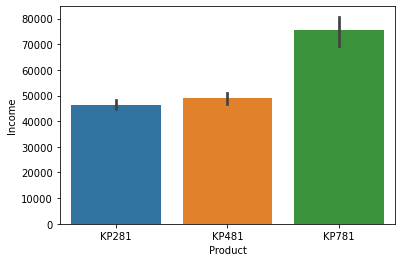

In [441]:
sns.barplot(data=df,y=df['Income'],x=df['Product'])

<AxesSubplot:xlabel='Product', ylabel='Income'>

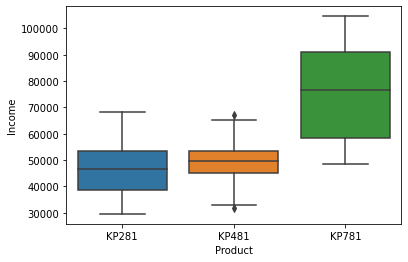

In [442]:
sns.boxplot(data=df,y=df['Income'],x=df['Product'])

- Customers having annual salary below $ 55000 usually buy KP281 or KP481.

- Customers having annual salary above $ 55000 are most likely to buy KP781.
- Median Salary of customers buying KP281 and KP481 is much lower than KP&781.
- Median Salary of Customers buying KP281 and KP481 is arround 45k-50k USD vs 75K USD for KP781

#### Income VS Gender

<AxesSubplot:xlabel='Gender', ylabel='Income'>

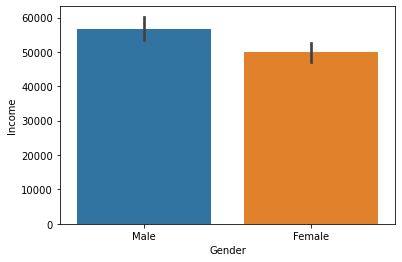

In [443]:
sns.barplot(data=df,y=df['Income'],x=df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Income'>

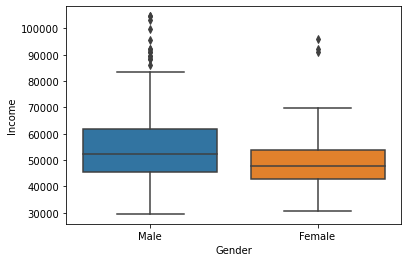

In [444]:
sns.boxplot(data=df,y=df['Income'],x=df['Gender'])

- Median Salary of Male is greater than that of female.
- There are more males than females who have very high salaries.
- Starting Salary is same for both males and females.

<AxesSubplot:xlabel='Fitness', ylabel='Income'>

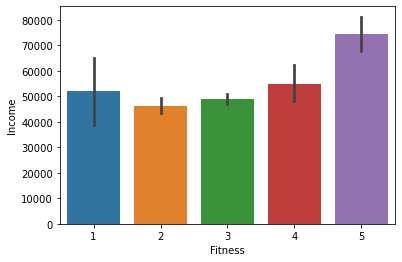

In [445]:
sns.barplot(data=df,y=df['Income'],x=df['Fitness'])

<AxesSubplot:xlabel='Fitness', ylabel='Income'>

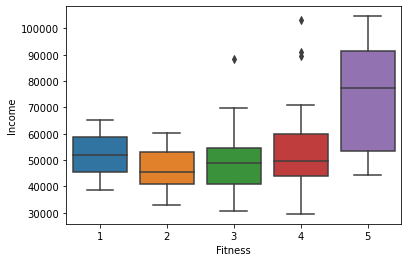

In [446]:
sns.boxplot(data=df,y=df['Income'],x=df['Fitness'])

- There is a direct corelation between Income and Fitness.Rich people pay more attention to their health.

<AxesSubplot:xlabel='Education', ylabel='Income'>

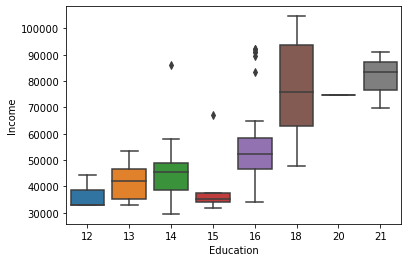

In [452]:
sns.boxplot(data=df,y=df['Income'],x=df['Education'])

- People educated till 16th grade or above have more income.

<AxesSubplot:xlabel='Education', ylabel='Miles'>

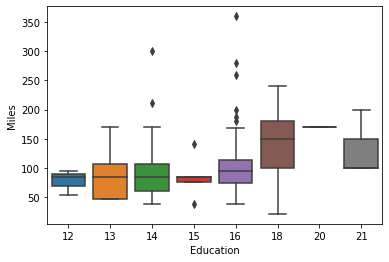

In [453]:
sns.boxplot(data=df,y=df['Miles'],x=df['Education'])

- People educated till 16th grade or above focus more on their health.This shows that more the education more is the health awareness. 

<AxesSubplot:xlabel='Gender', ylabel='Education'>

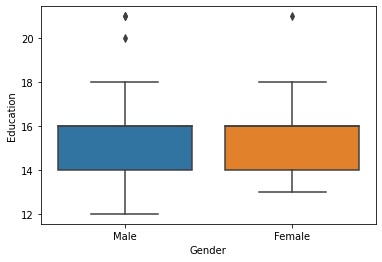

In [457]:
sns.boxplot(data=df,y=df['Education'],x=df['Gender'])

- Educational Level of both male and female is the same

<AxesSubplot:xlabel='Product', ylabel='Usage'>

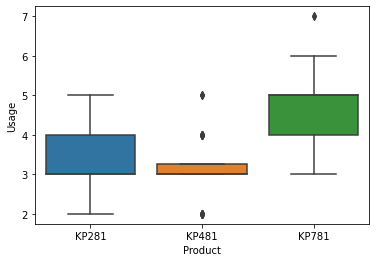

In [486]:
sns.boxplot(data=df,y=df['Usage'],x=df['Product'])

- Customers using treadmill more than 4 -5 times a week usually prefer KP781.

# Multi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Income'>

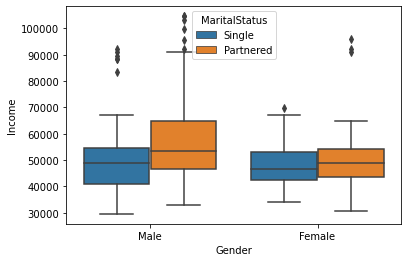

In [447]:
sns.boxplot(data=df,x='Gender',y='Income',hue='MaritalStatus')

- Male and Females who are partnered have higher median salary than those of Single.
- Partnered Male have the highest income above all.

<AxesSubplot:xlabel='Gender', ylabel='Income'>

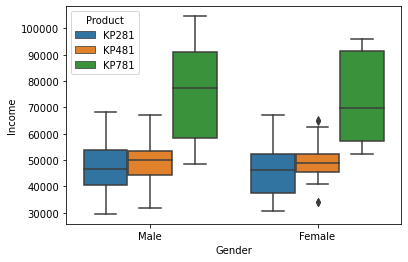

In [448]:
sns.boxplot(data=df,x='Gender',y='Income',hue='Product')

- Irrespective of gender, customers with high income prefer KP781

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

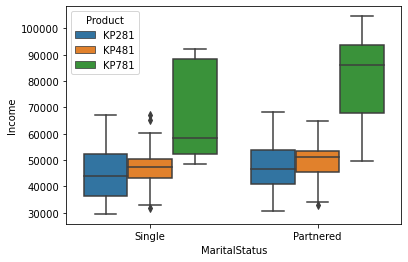

In [449]:
sns.boxplot(data=df,x='MaritalStatus',y='Income',hue='Product')

- Among KP781 Customers,Partnered male have significantly higher median income than single. 

<AxesSubplot:xlabel='Income', ylabel='Miles'>

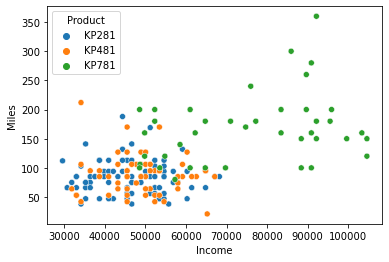

In [450]:
sns.scatterplot(data=df,x='Income',y='Miles',hue='Product')

- Customers having very high income run more mile and tend to buy KP781

In [476]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

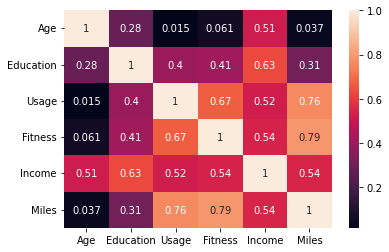

In [478]:
sns.heatmap(df.corr(),annot=True)

- There is a high corelation between:
    - Education and Income
        - The more the education,more is the income.
    - Education and Fitness
        - The more educated the customer,the more attention will be paid to health and fitness.
    - Usage and Fitness
        - Customers using treadmill more number of times in a week will be more fit.
    - Usage and Income
        - More the income of the customer,more is the attention towards health and better is the usage of the treadmill.
    - Usage and Miles
        - More usage suggest more number of miles run on treadmill.
    - Fitness and Income
        - More the income,more is the attention towards health or customer with better health have high income.
    - Fitness and Miles
        - The more the number of miles you walk/run on the tradmill better will be the fitness of the customer.

# Recommendatitions
### Irrespective of gender, customers with very high income should be pitched KP781.
### Customers who do not have a very high income should be pitched KP281, KP481 focusing on KP481 more.
### Female customers should be sold KP281 and KP481 as we can see that given a female there is only 9% chance that she will buy KP781.
### Customers who run for more than 100 Miles in a week should be recommended KP781.
### Customers who have rated themselves 4-5 in Fitness should be recommended KP781.
### Customers who have education above 16 are highly educated with high income as well.  Therefore, they should be pitched KP781.
### Customers using treadmill more than 4 -5 times a week should be recommended KP781.
### Customers who have average income,education below 16,Usage between 3-4 Days in a week,Fitness rating below 4 and miles less than 100 should be pitched      KP281 and KP481.